In [102]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image
import pandas as pd

%matplotlib inline

勾配降下法を使ったピークフィッティングをする想定で、様々はオプティマイザーについて理解する。

ピーク形状はガウシアン関数
$$
Gauss(x, \mu, \sigma) = exp \left( -{\dfrac{(x-\mu_2)^2}{2\sigma^2}} \right)
$$
に従うとして、2のピークからなるデータ$D(x,y)$があるとする。

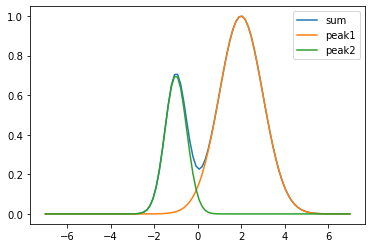

In [103]:
# 標準データ
def gauss(x, mu, simga):
    return np.exp(-(x-mu)**2/(2*simga**2))

N = 100
x = np.linspace(-7, 7, N)
Phi = np.array([gauss(x, 2, 1), gauss(x, -1, 0.5)]).T
w = np.array([1.0, 0.7])
y_true = Phi @ w
plt.plot(x, y_true, label="sum")
plt.plot(x, w[0] * gauss(x, 2, 1), label="peak1")
plt.plot(x, w[1] * gauss(x, -1, 0.5), label="peak2")
plt.legend()

2つのピーク強度$w$、ピークの幅$\sigma$がそれぞれ、$w=(1.0, 0.7), \sigma=(1.0, 0.5)$とわかっているとして(こんな状況はあり得ないが)、最もらしいピークの位置を勾配降下法で求めるとする。つまり、2乗誤差
$$
\begin{aligned}
MSE(\mu_1, \mu_2)&=\dfrac{1}{N}\sum^N_{n=1} (\hat{y_n} (\mu_1,\mu_2)-y_n)^2 \\
\hat{y_n}(\mu_1, \mu_2)&=1.0exp \left( -{\dfrac{(x-\mu_1)^2}{2\times 1.0^2}} \right) + 0.7exp \left( -{\dfrac{(x-\mu_2)^2}{2\times 0.5^2}} \right)
\end{aligned}
$$
が最小になるような$(\mu_1, \mu_2)$を求める。(この場合解析的に解けるけど、本末転倒なのであくまで勾配降下法で頑張る。)この平均２乗誤差を$\mu_1, \mu_2$に対してプロットすると

Text(0.5, 0, '$E$')

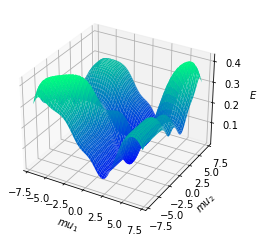

In [105]:
mu1 = np.linspace(-7, 7, 100)
mu2 = np.linspace(-7, 7, 100)

mmu1, mmu2 = np.meshgrid(mu1, mu2)
peak1 = gauss(x.reshape(-1,1,1), np.expand_dims(mmu1, axis=0), 1)
peak2 = gauss(x.reshape(-1,1,1), np.expand_dims(mmu2, axis=0), 0.5)
y_hat = 1.0*peak1 + 0.7 * peak2

MSE = np.mean((y_hat - y_true.reshape([-1, 1, 1]))**2, axis=0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mmu1, mmu2, MSE, cmap="winter")
ax.set_xlabel("$mu_1$")
ax.set_ylabel("$mu_2$")
ax.set_zlabel("$E$")

Text(0.5, 0, '$E$')

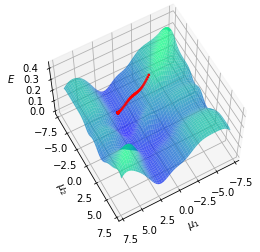

In [119]:
mu_init = np.array([-2., -3.])
sigma = np.array([1.0, 0.5])

Phi = np.array([gauss(x, mu_init[0], 1), gauss(x, mu_init[1], 0.5)]).T
y_hat = Phi @ w

mu_history = []
E_history = []
iter = 200
alpha = 1
mu = mu_init
for i in range(iter):
  Phi = gauss(x.reshape([-1, 1]), mu, sigma)
  y_hat = Phi @ w
  E = np.mean((y_true - y_hat)**2)
  dEdmu = -2*(y_true.reshape([-1, 1]) - y_hat.reshape([-1, 1])) / sigma * (x.reshape([-1, 1]) - mu) * gauss(x.reshape([-1, 1]), mu, sigma)
  dMSEdmu = np.mean(dEdmu, axis=0)

  E_history.append(E)
  mu_history.append(mu)
  mu = mu - alpha*dMSEdmu

mu_history = np.array(mu_history)
E_history = np.array(E_history)

fig = plt.figure()
ax = fig.add_subplot(projection='3d', computed_zorder=False)
ax.plot_surface(mmu1, mmu2, MSE, cmap="winter", alpha=0.7, zorder=1)
ax.scatter(mu_history[:, 0], mu_history[:, 1], E_history, color="red", s=3, zorder=1)
ax.view_init(elev=61, azim=61)

ax.set_xlabel("$\mu_1$")
ax.set_ylabel("$\mu_2$")
ax.set_zlabel("$E$")

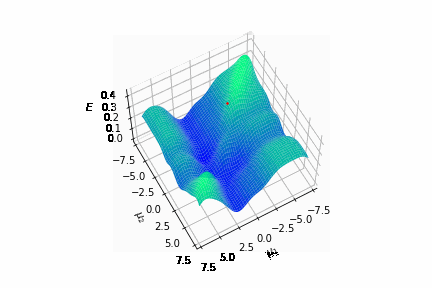

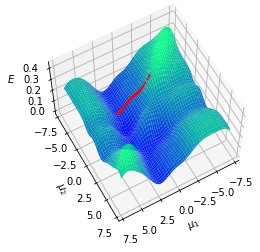

In [121]:
def update_graph(num):
  sc.axes.scatter(mu_history[num, 0], mu_history[num, 1], E_history[num], color="red", s=1, zorder=2)


fig = plt.figure()
ax = fig.add_subplot(projection='3d', computed_zorder=False)
ax.plot_surface(mmu1, mmu2, MSE, cmap="winter", zorder=1)
sc = ax.scatter(mu_history[0, 0], mu_history[0, 1], E_history[0], color="red", s=1, zorder=2)
ax.view_init(elev=61, azim=61)
ax.set_xlabel("$\mu_1$")
ax.set_ylabel("$\mu_2$")
ax.set_zlabel("$E$")

ani = matplotlib.animation.FuncAnimation(fig, update_graph, iter, interval=40, blit=False)
ani.save('out/gradient.gif', writer='pillow')
Image('out/gradient.gif')

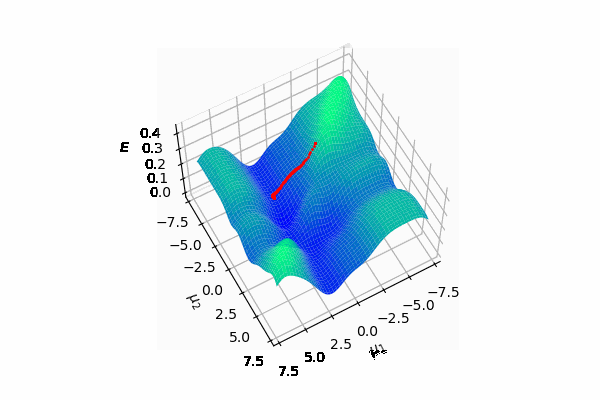

In [118]:
ani.save('out/gradient.gif', writer='pillow', dpi=100)
Image('out/gradient.gif')

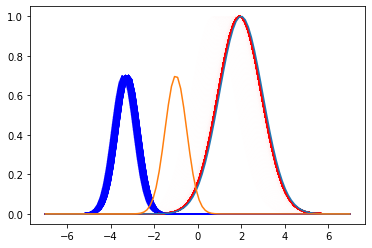

In [110]:
for i, mu in enumerate(mu_history):
  peak1 = w[0] *gauss(x , mu[0], sigma[0])
  peak2 = w[1] *gauss(x , mu[1], sigma[1])
  plt.plot(x, peak1, color="red", alpha=(i/iter)**3)
  plt.plot(x, peak2, color="b", alpha=(i/iter)**3)

plt.plot(x, w[0] * gauss(x, 2, 1), label="peak1")
plt.plot(x, w[1] * gauss(x, -1, 0.5), label="peak2")

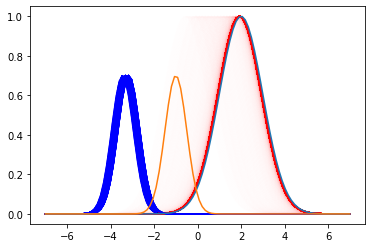

In [98]:
for i, mu in enumerate(mu_history):
  peak1 = w[0] *gauss(x , mu[0], sigma[0])
  peak2 = w[1] *gauss(x , mu[1], sigma[1])
  plt.plot(x, peak1, color="red", alpha=(i/iter)**2)
  plt.plot(x, peak2, color="b", alpha=(i/iter)**2)

plt.plot(x, w[0] * gauss(x, 2, 1), label="peak1")
plt.plot(x, w[1] * gauss(x, -1, 0.5), label="peak2")